In [80]:
import json
import os
import sys
import subprocess
import requests
import os.path
import gzip
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
import random
import shutil

In [2]:
dataRoot = "/datasets/sagarj/InstagramDataset_2016_seeded/"
tracking = "Tracking/instaPopTrackedVids/"
PostRoot = dataRoot + "instaPop/"
global_searched_data = PostRoot + "search_data.json.gz"
copyDir = dataRoot + "instaVids/"
copyVids = copyDir + "videos/"
sampleVids = copyDir + "samples/"
metaDir = copyDir + "meta/"

In [3]:
def readGzipJSON(filePath):
    with gzip.open(filePath, 'rb') as f:
        file_content = f.read()
    data = json.loads(file_content)
    return data

def getDuration(path):
    if os.path.exists(path):
        p = subprocess.Popen(['ffprobe' , '-i' , path , '-show_format'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        out, err = p.communicate()
        return out , err
    else: 
        return "" , -1
    
def make_time():
    time=dt.datetime.now()
    return int(time.mktime(now.timetuple()))

def getTrackedPosts(trackedDir):
    posts = os.listdir(trackedDir)
    trackedPosts = dict()
    for post in posts:
        postDir = trackedDir + post
        postMeta = os.listdir(postDir)
        for f in postMeta:
            if f == "post_full_data.json.gz":
                trackedPosts[post] = dict()
                try:
                    trackedPosts[post] = readGzipJSON(postDir + "/" + f)
                except ValueError: 
                    print "Problem Decoding JSON"
                    
    return trackedPosts
        

def getFileList(dataRoot):
    users = os.listdir(dataRoot)
    allUsers = dict()
    for user in users:
        if user.split('.')[-1] == 'gz':
            continue
        directory = dataRoot + user + "/"
        subs = os.listdir(directory)
        for s in subs:
            if s.split('.')[-1] == 'gz':
                continue
            allUsers[s] = dict()
            allUsers[s]['Posts'] = dict()
            userDir = directory + s + "/"
            posts = os.listdir(userDir)
            for post in posts: 
                if post == "user_full_data.json.gz":
                    allUsers[s]['Meta'] = dict()
                    json_file = userDir + post
                    allUsers[s]['Meta'] = readGzipJSON(json_file)
                else:
                    if post.split('.')[-1] == 'gz':
                        continue
                    allUsers[s]['Posts'][post] = dict()
                    postDir = userDir + post + "/"
                    postFiles = os.listdir(postDir)
                    for f in postFiles:
                        if f == "post_full_data.json.gz":
                            json_file = postDir + f
                            allUsers[s]['Posts'][post]['Meta'] = dict()
                            allUsers[s]['Posts'][post]['Meta'] = readGzipJSON(json_file)
                        else:
                            media_file = postDir + f
                            allUsers[s]['Posts'][post]['path'] = media_file
    return allUsers
        
def getVideoPosts(users):
    verifiedPosts = []
    vidToImgLikes = []
    vidToImg = []
    for u in verifiedUsers:
        vidLikes = 1.0
        imgLikes = 1.0
        vids = 1.0
        imgs = 1.0
        for p in verifiedUsers[u]['Posts']:
            verifiedPosts.append(verifiedUsers[u]['Posts'][p])
            if verifiedUsers[u]['Posts'][p]['Meta']['media']['is_video']:
                vidLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
                vids+=1
            else:
                imgLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
                imgs+=1
        vidToImgLikes.append((vidLikes/imgLikes))
        vidToImg.append(vids/imgs)
        
def copyFile(src, dest):
    if not os.path.exists(src): 
        return
    try:
        shutil.copy(src, dest)
    # eg. src and dest are the same file
    except shutil.Error as e:
        print('Error: %s' % e)
    # eg. source or destination doesn't exist
    except IOError as e:
        print('Error: %s' % e.strerror)
    

In [4]:
trackedVids = getTrackedPosts(dataRoot + tracking)

Problem Decoding JSON
Problem Decoding JSON


In [5]:
trackedVids[trackedVids.keys()[1]]

{u'media': {u'caption': u'\U0001f63b\U0001f63b\U0001f63b',
  u'caption_is_edited': False,
  u'code': u'BNgh5zxA8Zx',
  u'comments': {u'count': 4,
   u'nodes': [{u'created_at': 1480676372.0,
     u'id': u'17844951784180720',
     u'text': u'\u041f\u0440\u0435\u043b\u0435\u0441\u0442\u044c',
     u'user': {u'id': u'2984298946',
      u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/12783193_1694679310770349_1844594341_a.jpg',
      u'username': u'_elena_light123'}},
    {u'created_at': 1480680362.0,
     u'id': u'17844971590185331',
     u'text': u'\u041d\u0430\u0432\u0435\u0440\u043d\u043e\u0435 \u043f\u0435\u0440\u0435\u043f\u0438\u043b \u0432\u0447\u0435\u0440\u0430',
     u'user': {u'id': u'3921580547',
      u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/14280391_342093042807577_1779622889_a.jpg',
      u'username': u'raya_arykbayeva'}},
    {u'created_at': 1480680441.0,
     u'id': u'17865856882049650',
     u'text': u'\u041

In [6]:
users = getFileList(PostRoot)

In [7]:
users[users.keys()[1]]['Meta']['user']['id']

u'3996891168'

In [8]:
verifiedUsers = dict()
for u in users:
    if 'Meta' in users[u]:
        if users[u]['Meta']['user']:
            verifiedUsers[u] = dict()
            verifiedUsers[u] = users[u]
    

In [72]:
verifiedPosts = []
vidToImgLikes = []
vidPosts = dict()
vidToImg = []
for u in verifiedUsers:
    vidLikes = 1.0
    imgLikes = 1.0
    vids = 1.0
    imgs = 1.0
    for p in verifiedUsers[u]['Posts']:
        verifiedPosts.append(verifiedUsers[u]['Posts'][p])
        if verifiedUsers[u]['Posts'][p]['Meta']['media']['is_video']:
            vidPosts[p] = dict()
            vidPosts[p] = verifiedUsers[u]['Posts'][p]
            #vidPosts.append(verifiedUsers[u]['Posts'][p])
            vidLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
            vids+=1
        else:
            imgLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
            imgs+=1
    vidToImgLikes.append((vidLikes/imgLikes))
    vidToImg.append((vidLikes/vids)/(imgLikes/imgs))
    

In [75]:
print vidPosts[vidPosts.keys()[1]] , vidPosts.keys()[1]

 {'path': '/datasets/sagarj/InstagramDataset_2016_seeded/instaPop/April Johnson/856559526__april_johnson_/BHXssefhXSq/13605493_1748023018808426_1372735622_s.mp4', 'Meta': {u'media': {u'caption_is_edited': False, u'code': u'BHXssefhXSq', u'video_views': 199, u'video_url': u'https://scontent.cdninstagram.com/t50.2886-16/13605493_1748023018808426_1372735622_s.mp4', u'usertags': {u'nodes': []}, u'comments_disabled': False, u'owner': {u'username': u'_april_johnson_', u'full_name': u'April Johnson', u'requested_by_viewer': False, u'followed_by_viewer': False, u'has_blocked_viewer': False, u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/14727451_645209805639395_347962504971812864_a.jpg', u'is_unpublished': False, u'blocked_by_viewer': False, u'id': u'856559526', u'is_private': False}, u'comments': {u'count': 0, u'page_info': {u'has_previous_page': False, u'start_cursor': None, u'end_cursor': None, u'has_next_page': False}, u'nodes': []}, u'is_ad': False, u'caption

In [17]:
vidLikes = []
vidViews = []
for u in trackedVids:
    if 'media' in trackedVids[u]:
        vidLikes.append(trackedVids[u]['media']['likes']['count'])
        vidViews.append(trackedVids[u]['media']['video_views'])
    

In [18]:
vidLikes  = [1 if i < 1 else i for i in vidLikes]
vidViews  = [1 if i < 1 else i for i in vidViews]

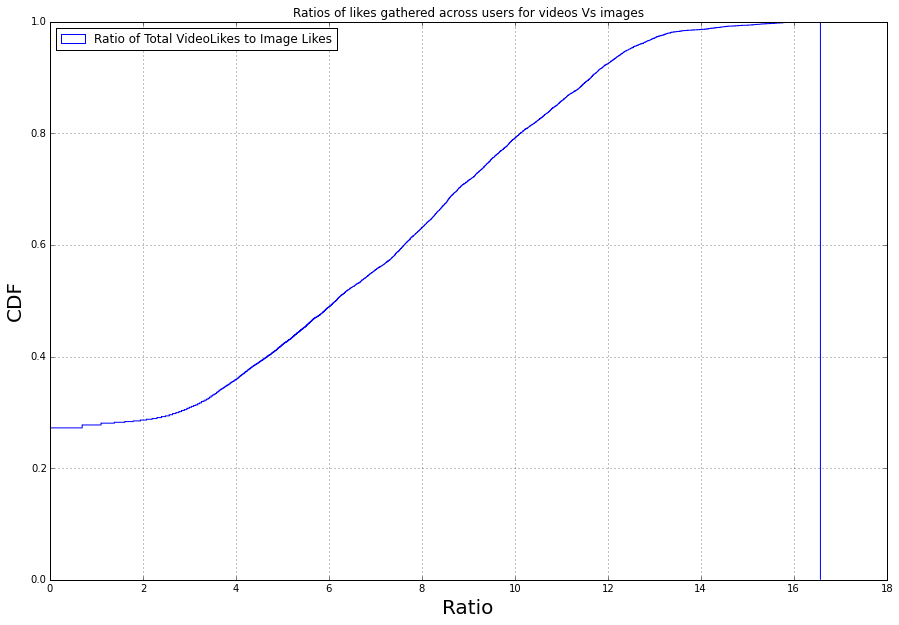

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log(vidViews), 10000, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [20]:
# print verifiedUsers[verifiedUsers.keys()[102]]['Meta']['user']['id']
# print verifiedUsers[verifiedUsers.keys()[102]]['Meta']['user']['username']
# print verifiedUsers[verifiedUsers.keys()[102]]['Posts']

# print verifiedPosts[1]['path']

print vidPosts[1]['path']
print len(vidPosts)

/datasets/sagarj/InstagramDataset_2016_seeded/instaPop/AlaskanBullWorm/332689774_alaskanbullworm69/BLiC752BRec/14680058_343215596025647_5027764999611744256_n.mp4
14765


In [21]:
vidToImgLikes = [min(i,10.0) for i in vidToImgLikes]
vidToImg = [min(i,10.0) for i in vidToImg]

In [22]:
print np.median(vidToImgLikes), len(vidToImgLikes)

0.174418604651 3243


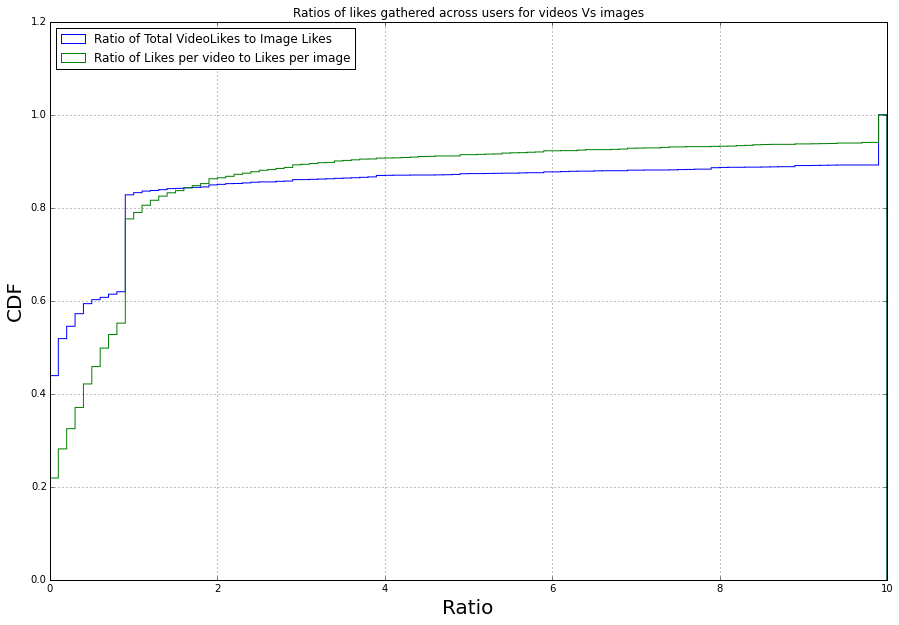

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(vidToImgLikes, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.hist(vidToImg, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [24]:
len(verifiedPosts)

80911

In [25]:
out , err = getDuration(vidPosts[1]['path'])
print out.split('\n')[7].split("=")[1]

26.262000


In [26]:
vidPosts[2]['Meta']['media']['code']

u'BLADL6hh1Xq'

In [27]:
# durationDict = dict()

In [40]:

# for post in vidPosts:
#     if post['Meta']['media']['code'] not in durationDict:
#         if 'path' not in post:
#             continue
#         out , err = getDuration(post['path'])
#         if err > 0:
#             modes = out.split('\n')
#             if len(modes) < 8 :
#                 continue
#             duration = modes[7]
#             if duration.split("=")[0] == 'duration':
#                 durationDict[post['Meta']['media']['code']] = duration.split("=")[1]
    

In [41]:
#durationDict[durationDict.keys()[1]]

'9.010000'

In [139]:
trackedVids[trackedVids.keys()[100]]['media']

{u'caption': u'#beatbox #beatboxing #beatboxer #80fitz #scottysire #vanilladingdong #ihateyou \U0001f601',
 u'caption_is_edited': False,
 u'code': u'7mzQ5Enhrm',
 u'comments': {u'count': 1,
  u'nodes': [{u'created_at': 1442398587.0,
    u'id': u'17841671128075926',
    u'text': u'@80fitz',
    u'user': {u'id': u'2164251925',
     u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/11875335_1658574611054583_195382315_a.jpg',
     u'username': u'80fitzbigfan'}}],
  u'page_info': {u'end_cursor': None,
   u'has_next_page': False,
   u'has_previous_page': False,
   u'start_cursor': None}},
 u'comments_disabled': False,
 u'date': 1442223502,
 u'dimensions': {u'height': 640, u'width': 640},
 u'display_src': u'https://scontent.cdninstagram.com/t51.2885-15/e15/11850395_652793151529606_1589452297_n.jpg?ig_cache_key=MTA3Mzc3MTAyMjMzODg5MDQ3MA%3D%3D.2',
 u'id': u'1073771022338890470',
 u'is_ad': False,
 u'is_video': True,
 u'likes': {u'count': 22,
  u'nodes': [{u'user': {u

In [135]:
metaDict = dict()

In [136]:
for d in durationDict: 
    if d in trackedVids:
        if 'media' in trackedVids[d]:
            metaDict[d] = dict()
            metaDict[d]['likes'] = trackedVids[d]['media']['likes']['count']
            metaDict[d]['views'] = trackedVids[d]['media']['video_views']
            metaDict[d]['length'] = durationDict[d]
            metaDict[d]['meta'] = vidPosts[d]

In [156]:
durations = [float(d) for d in durationDict.values()]
np.median(durations)

12.911

In [79]:
# with open(dataRoot + 'InstaMeta.json', 'w') as fp:
#     json.dump(metaDict, fp)

In [48]:
# with open(dataRoot + 'InstaMeta.json', 'rb') as fp:
#     metaDict = json.load(fp)

In [143]:


longDict = {k: v for k, v in metaDict.iteritems() if float(v['length']) > 45.0 }

In [144]:
shortDict = {k: v for k, v in metaDict.iteritems() if float(v['length']) < 20.0 }

In [145]:
sampledLong = random.sample(longDict.items() , 1000)
sampledShort = random.sample(shortDict.items() , 1000)

In [146]:
sampledShort[1][1]['views']

0

In [149]:
longLikesPerViews = []
shortLikesPerViews = []
for u in sampledLong:        
    views = u[1]['views']
    likes = u[1]['likes']
    if views < 1:
        views = 1
    if likes < 1:
        likes = 1
    longLikesPerViews.append(float(likes))
for u in sampledShort:   
    views = u[1]['views']
    likes = u[1]['likes']
    if views < 1:
        views = 1
    if likes < 1:
        likes = 1
    shortLikesPerViews.append(float(likes))

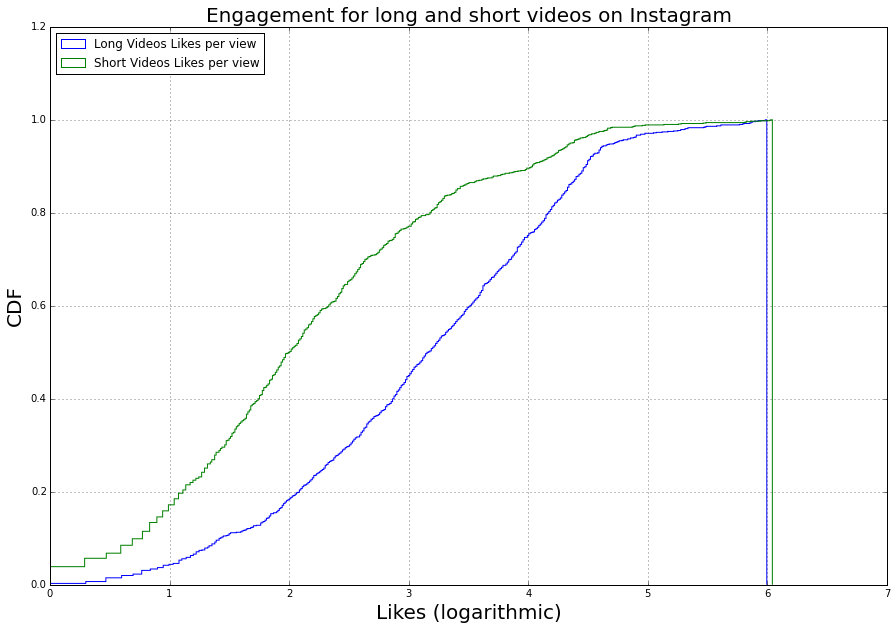

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log10(longLikesPerViews), 500, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.hist(np.log10(shortLikesPerViews), 500, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Engagement for long and short videos on Instagram" , fontsize = 20)
plt.xlabel("Likes (logarithmic)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Long Videos Likes per view ' , 'Short Videos Likes per view'], loc='upper left')
plt.grid()
plt.show()

In [105]:
sampledVideos = random.sample(longDict.items() , 200)
for i in sampledVideos:
    print i[1]['length']

51.874000
59.745000
57.261000
33.971000
54.567000
60.117000
45.744000
60.047000
47.485000
60.117000
50.017000
60.117000
60.117000
31.092000
59.188000
60.117000
42.400000
55.682000
56.913000
41.208000
54.379000
30.210000
59.095000
60.054000
54.823000
32.950000
55.104000
40.148000
39.800000
57.423000
35.411000
60.117000
45.070000
47.532000
60.044000
59.991000
54.103000
47.702000
30.047000
35.736000
60.117000
60.117000
48.282000
41.007000
59.908000
41.169000
60.117000
60.117000
52.849000
56.959000
31.162000
41.913000
47.694000
59.560000
44.954000
52.826000
45.446000
45.210000
60.047000
40.574000
59.397000
54.998000
59.960000
58.979000
42.330000
30.279000
59.281000
35.736000
55.427000
59.827000
47.787000
36.270000
49.064000
60.117000
31.046000
32.787000
53.615000
32.787000
60.117000
32.834000
33.135000
33.669000
33.414000
30.831000
59.860000
60.076000
59.049000
57.091000
51.755000
47.950000
43.027000
42.191000
59.293000
40.310000
30.102000
33.646000
36.131000
53.476000
50.504000
39.407000


In [106]:
# sampleDir = "/datasets/sagarj/instaLongVidSamples/"
# for s in sampledVideos:
#     metaDir = sampleDir + "meta/"
#     vidDir = sampleDir + "videos/"
#     if 'path' in s[1]['meta']:
#         fp = open(metaDir + str(s[0]) + ".json" , 'wb')
#         json.dump(s[1],fp)
#         fp.close()
#         copyFile(s[1]['meta']['path'] , vidDir + str(s[0]) + ".mp4")

In [49]:
duration = []
likes = []
views = []
for entry in metaDict:
    if metaDict[entry]['likes'] > 20:
        duration.append(metaDict[entry]['length'])
        #likesPerViews.append(float(metaDict[entry]['likes'])/float(metaDict[entry]['views']+1))
        likes.append(float(metaDict[entry]['likes']))
        views.append(float(metaDict[entry]['views']))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(vidToImgLikes, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.hist(vidToImg, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [50]:
d = [float(i) for i in duration]

In [51]:
print np.median(likes), np.median(views) , np.median(d)

489.0 2084.5 14.35


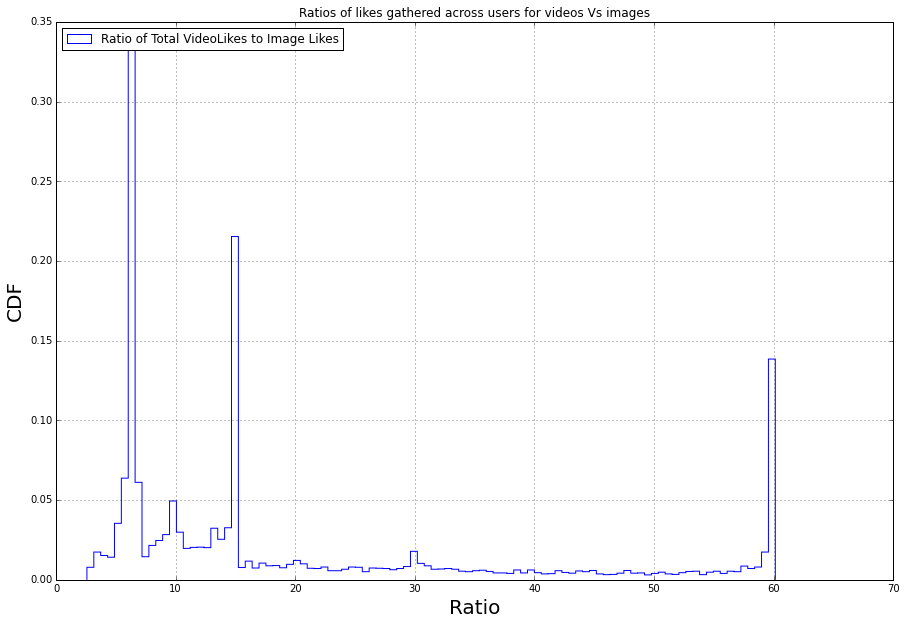

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(d, 100, normed=1,histtype='step', cumulative=False,linewidth = 1.0)
#plt.hist(vidToImg, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [53]:
heatmap, xedges, yedges = np.histogram2d(d , np.log10(likes), bins=50)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

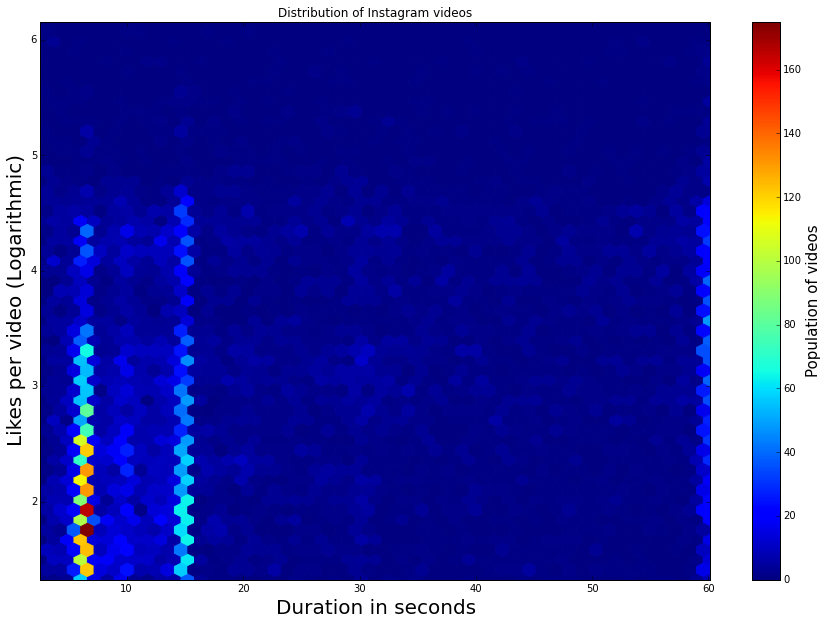

In [57]:
# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 
from matplotlib import cm as CM
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
x = d

y = np.log10(likes)
gridsize=50
plt.hexbin(x, y, gridsize=gridsize, cmap=CM.jet, bins=None)
plt.axis([np.min(x), np.max(x), np.min(y), np.max(y)])
plt.title("Distribution of Instagram videos")
plt.xlabel("Duration in seconds",fontsize = 20)
plt.ylabel("Likes per video (Logarithmic)",fontsize = 20)

cb = plt.colorbar()
cb.set_label('Population of videos',fontsize = 15)
plt.show()   

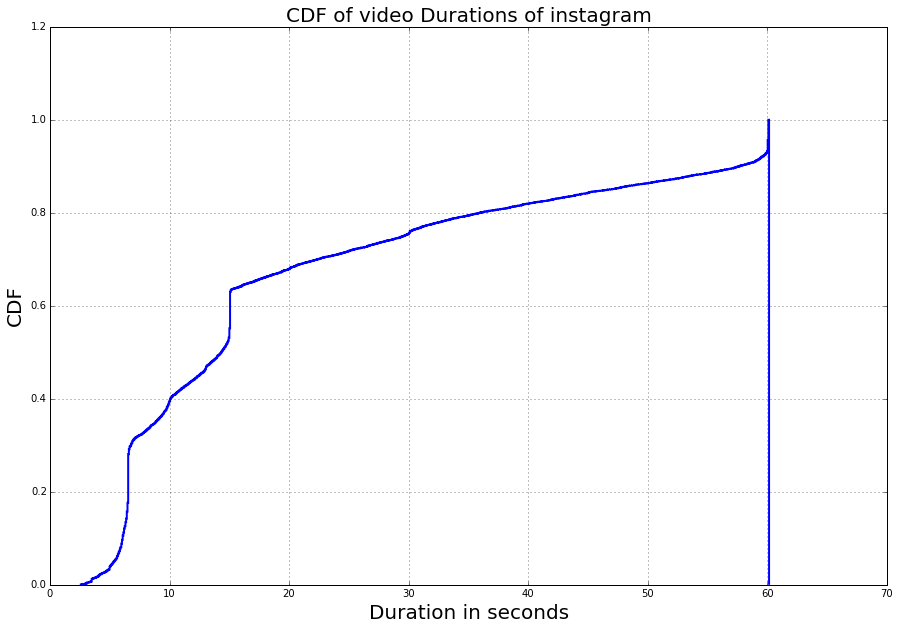

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(d, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("CDF of video Durations of instagram", fontsize = 20)
plt.xlabel("Duration in seconds",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
#plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [61]:
metaDict[1]

KeyError: 1